# Assignmnet 2 (Task 2) 

Import packages

In [1]:
# Data analysis
import os
import pandas as pd
from tqdm import tqdm # For telling me how long there is left for my code to run (Progress bar)

# NLP
import spacy
nlp = spacy.load("en_core_web_sm")

# sentiment analysis VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() # Initializing VADER
# sentiment with spacyTextBlob
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob') # Add to spacy pipeline

# visualisations
import matplotlib.pyplot as plt

Load Data

In [2]:
# Get the filepath
filepath = os.path.join("..", "..", "..", "CDS-LANG", "tabular_examples", "fake_or_real_news.csv")
# Reading the filepath 
data = pd.read_csv(filepath)

In [3]:
# CHecking the data 
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
# Having a look at the REAL and FAKE values 
data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

Split data

In [5]:
# Creating real_news dataset
real_news = data[data['label'] == "REAL"]
# resetting index
real_news = real_news.reset_index()
# Checking dataset 
real_news["label"].value_counts()

REAL    3171
Name: label, dtype: int64

In [6]:
# Creating fake_news dataset 
fake_news = data[data['label'] == "FAKE"]
# resetting index
fake_news = fake_news.reset_index()
# Checking dataset 
fake_news["label"].value_counts()

FAKE    3164
Name: label, dtype: int64

In [7]:
# Sentimnet analysis (with VADER)
text_example = real_news["title"][0]
analyzer.polarity_scores(text_example)

{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

### Real News

In [8]:
# Iterating through the real news
real_data = []

# for-loop
for headline, ID in tqdm(zip(nlp.pipe(real_news["title"], batch_size=500), real_news["Unnamed: 0"])):
    sentiment = analyzer.polarity_scores(text_example)
    for entity in headline.ents:
        if entity.label_ == "GPE":
            real_data.append((ID, sentiment["neg"], sentiment["neu"], sentiment["pos"], sentiment["compound"], entity.text))

3171it [00:05, 592.53it/s]


In [9]:
# Checking the data 
print(real_data[0:10])

[(3608, 0.0, 0.762, 0.238, 0.3612, 'Paris'), (875, 0.0, 0.762, 0.238, 0.3612, 'New York'), (2909, 0.0, 0.762, 0.238, 0.3612, 'Iran'), (1357, 0.0, 0.762, 0.238, 0.3612, 'Iowa'), (3304, 0.0, 0.762, 0.238, 0.3612, 'Iran'), (3078, 0.0, 0.762, 0.238, 0.3612, 'America'), (778, 0.0, 0.762, 0.238, 0.3612, 'Staten Island'), (755, 0.0, 0.762, 0.238, 0.3612, 'W. Va.'), (2777, 0.0, 0.762, 0.238, 0.3612, 'Afghanistan'), (3648, 0.0, 0.762, 0.238, 0.3612, 'Orlando')]


In [10]:
# Creating dataframe 
real_df = pd.DataFrame(real_data, columns = ["ID", "neg", "neu", "pos", "compound", "GPE"])

In [11]:
# Checking the dataframe 
real_df.head()

,ID,neg,neu,pos,compound,GPE
0,3608,0.0,0.762,0.238,0.3612,Paris
1,875,0.0,0.762,0.238,0.3612,New York
2,2909,0.0,0.762,0.238,0.3612,Iran
3,1357,0.0,0.762,0.238,0.3612,Iowa
4,3304,0.0,0.762,0.238,0.3612,Iran


In [12]:
# Saving the dataframe
outpath_real = os.path.join("output", "real_news_df.csv")
real_df.to_csv(outpath_real, index=False)

### Fake News

In [13]:
# Iterating through the fake news
fake_data = []

# For-loop
for headline, ID in tqdm(zip(nlp.pipe(fake_news["title"], batch_size=500), fake_news["Unnamed: 0"])):
    sentiment = analyzer.polarity_scores(text_example)
    for entity in headline.ents:
        if entity.label_ == "GPE":
            fake_data.append((ID, sentiment["neg"], sentiment["neu"], sentiment["pos"], sentiment["compound"], entity.text))

3164it [00:05, 569.25it/s]


In [14]:
# Checking the data
print(fake_data[0:10])

[(6903, 0.0, 0.762, 0.238, 0.3612, 'Tehran'), (6903, 0.0, 0.762, 0.238, 0.3612, 'USA'), (7385, 0.0, 0.762, 0.238, 0.3612, 'UK'), (7385, 0.0, 0.762, 0.238, 0.3612, 'Russia'), (9016, 0.0, 0.762, 0.238, 0.3612, 'Empire'), (7540, 0.0, 0.762, 0.238, 0.3612, 'Detroit'), (7049, 0.0, 0.762, 0.238, 0.3612, 'US'), (6763, 0.0, 0.762, 0.238, 0.3612, 'Russia'), (6763, 0.0, 0.762, 0.238, 0.3612, 'USA'), (9398, 0.0, 0.762, 0.238, 0.3612, 'Russia')]


In [15]:
# Creating dataframe 
fake_df = pd.DataFrame(fake_data, columns = ["ID", "neg", "neu", "pos", "compound", "GPE"])

In [16]:
# Saving the dataframe
outpath_fake = os.path.join("output", "fake_news_df.csv")
fake_df.to_csv(outpath_fake, index=False)

### Plotting 

Real News

In [17]:
# Finding the 10 most common entities
values = real_df["GPE"].value_counts().values.tolist()[0:10]
gpes = real_df["GPE"].value_counts().index.tolist()[0:10]

In [18]:
print(values)
print(gpes)

[129, 94, 60, 49, 42, 42, 29, 23, 22, 20]
['Obama', 'Iran', 'US', 'America', 'U.S.', 'Iowa', 'Syria', 'Russia', 'Paris', 'New Hampshire']


<BarContainer object of 10 artists>

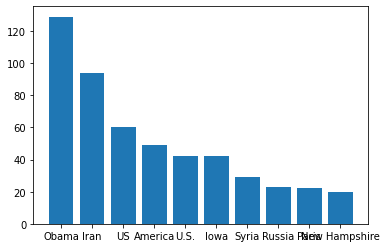

In [19]:
# Creating figure
fig, ax = plt.subplots()
ax.bar(gpes, values)

Real News

In [20]:
# Finding the 10 most common entities
values = fake_df["GPE"].value_counts().values.tolist()[0:10]
gpes = fake_df["GPE"].value_counts().index.tolist()[0:10]

In [21]:
print(values)
print(gpes)

[104, 93, 39, 38, 36, 19, 18, 15, 12, 12]
['US', 'Russia', 'U.S.', 'Syria', 'America', 'Israel', 'Mosul', 'China', 'Obama', 'UK']


<BarContainer object of 10 artists>

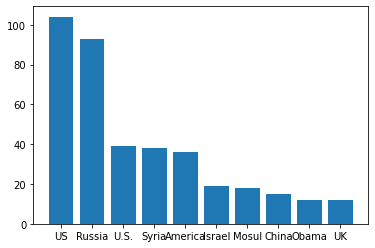

In [22]:
# Creating figure
fig, ax = plt.subplots()
ax.bar(gpes, values)